# Les essentiels du packages scipy en machine learning et data science

***

## Module interpolate

In [1]:
import numpy as np

In [3]:
x = np.linspace(0, 10, 20)
y = x**2

In [4]:
import matplotlib.pyplot as plt

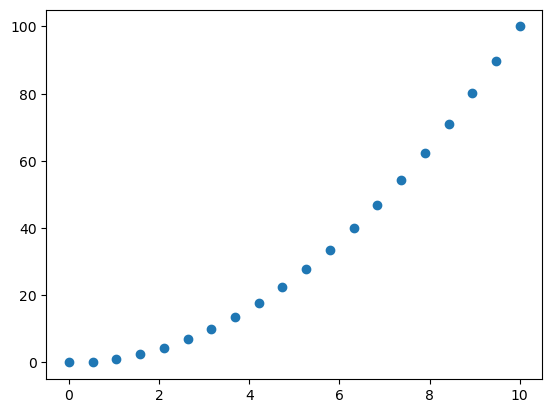

In [5]:
plt.scatter(x, y)
plt.show()

On peut ajouter des points par interpolation linéaire

In [8]:
from scipy.interpolate import interp1d

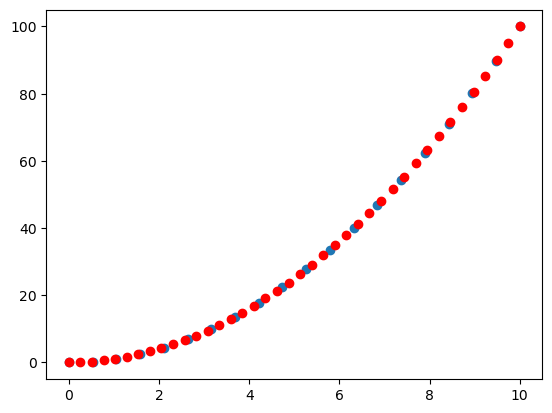

In [10]:
# fonction d'interpolation linéaire
f = interp1d(x, y, kind = 'linear')
new_x = np.linspace(0, 10, 40)
result = f(new_x) # Tableau numpy
plt.scatter(x, y)
plt.scatter(new_x, result, c = 'r')

Avant de faire une interpolation, il faut être sûr qu'elle correspond à la réalité. Elle est à éviter lorsque le modèle comporte des oscillations 

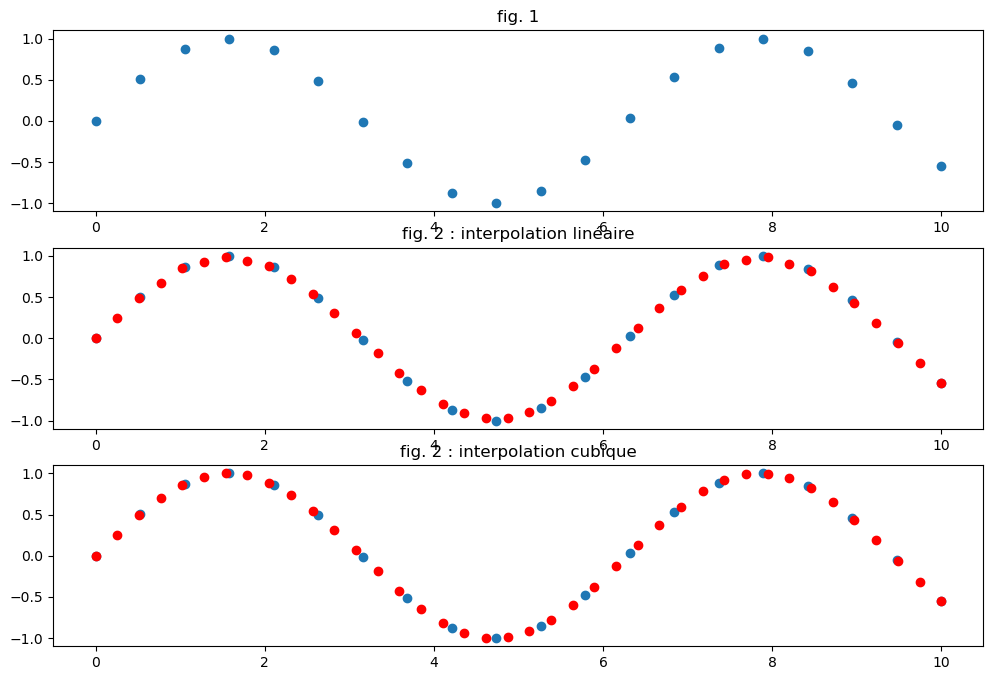

In [15]:
# Interpolation cubique
z = np.sin(x)

gc = interp1d(x, z, kind = 'cubic')
gl = interp1d(x, z, kind = 'linear')

zl = gl(new_x)
zc = gc(new_x)

plt.figure(figsize = (12, 8))

plt.subplot(3, 1, 1)
plt.scatter(x, z)
plt.title('fig. 1')

plt.subplot(3, 1, 2)
plt.scatter(x, z)
plt.scatter(new_x, zl, c = 'r')
plt.title('fig. 2 : interpolation linéaire')

plt.subplot(3, 1, 3)
plt.scatter(x, z)
plt.scatter(new_x, zc, c = 'r')
plt.title('fig. 2 : interpolation cubique')

plt.show()

Il existe d'autres types d'interpolation, voir documentation

## Modude optimize

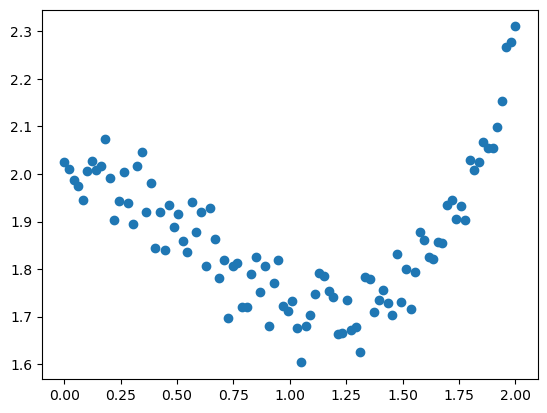

In [16]:
x = np.linspace(0, 2, 100)
y = 1/3 * x**3 -3/5 * x**2 + 2 + np.random.randn(x.shape[0]) / 20 # polynôme aucun on a ajouter des bruits
plt.scatter(x, y)

Le travail consiste à développer un modèle statistique qui corresponde à ce nuage de points


#### curve_fit

On peut utiliser la fonction curve_fit qui utilise la MCO pour déterminer les paramètres d'optimisation d'un modèle

In [17]:
# Définissons un modèle

def f(x, a, b, c, d) :
    return a * x**3 + b * x**2 + c * x + d

In [18]:
from scipy import optimize

In [19]:
optimize.curve_fit(f, x, y)
# Fournit deux tableaux: le premier est celui des paramètres a, b, c, d et le second est celui de la matrice de covariance

(array([ 0.34601159, -0.62871732,  0.00473476,  2.00587175]),
 array([[ 0.0009745 , -0.00292349,  0.00232706, -0.00037806],
        [-0.00292349,  0.0090259 , -0.00749205,  0.00130277],
        [ 0.00232706, -0.00749205,  0.00664815, -0.00130942],
        [-0.00037806,  0.00130277, -0.00130942,  0.00035102]]))

In [20]:
parameters, cov_matriix = optimize.curve_fit(f, x, y)

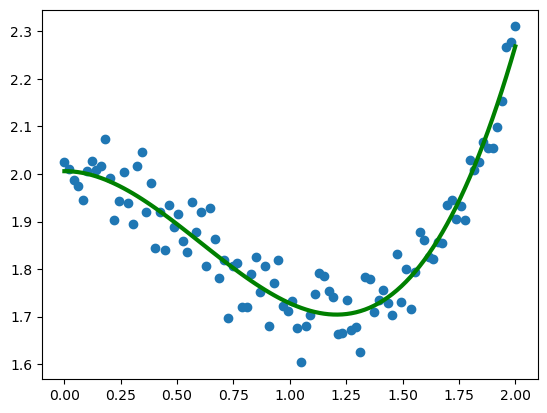

In [23]:
plt.scatter(x, y)
plt.plot(x, f(x, parameters[0], parameters[1], parameters[2], parameters[3]), c = 'g', lw = 3)
plt.show()

Un tel travail peut être accompli dans scikit learn

#### Utilisation de la fonction minimize

In [24]:
def g (x) :
    return x**2 + 15 * np.sin(x)

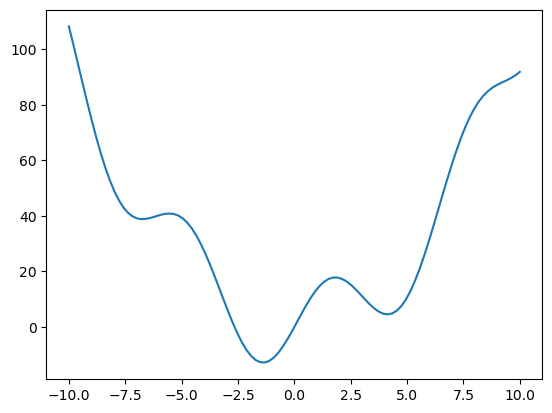

In [28]:
X = np.linspace(-10, 10, 100)
Y = g(X)
plt.plot(X, Y)

In [29]:
optimize.minimize(g, x0 =-10)

      fun: -12.823616887804782
 hess_inv: array([[0.05972981]])
      jac: array([-1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-1.38505605])

In [30]:
# Sauvegarder le minimum
x0 = -10
min_x = optimize.minimize(g, x0 =-10).x

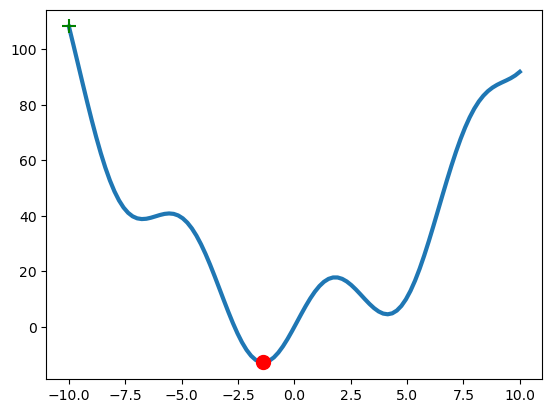

In [31]:
plt.plot(X, g(X), lw = 3, zorder = -1)
plt.scatter(min_x, g(min_x), s = 100, c = 'r', zorder = 1)
plt.scatter(x0, g(x0), marker = '+', s = 100, c = 'g', zorder = 1)
plt.show()

Les fonctions minimize et contour

In [32]:
def f(x) :
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

C:\Users\asus\AppData\Local\Temp\ipykernel_7300\1416535546.py:10: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  minx = optimize.minimize(f, x0 = x0).x


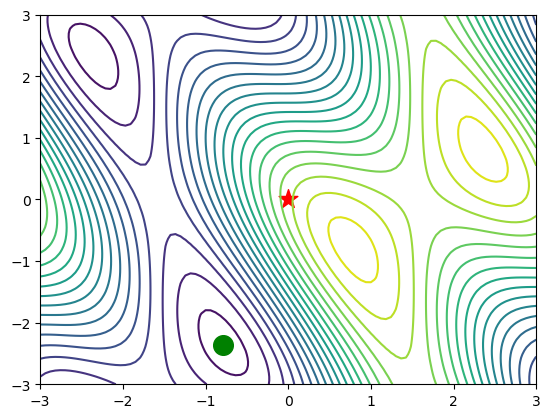

minimum : [-0.78539916 -2.35619343]


In [36]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

# Point de départ pour la recherche du minimum
x0 = np.zeros((2,1))
plt.scatter(x0[0], x0[1], marker = '*', s = 200, c = 'r')

minx = optimize.minimize(f, x0 = x0).x
plt.scatter(minx[0], minx[1], c = 'g', s = 200)

plt.show()
print('minimum :', minx) 

## Module de traitement du signal / fft

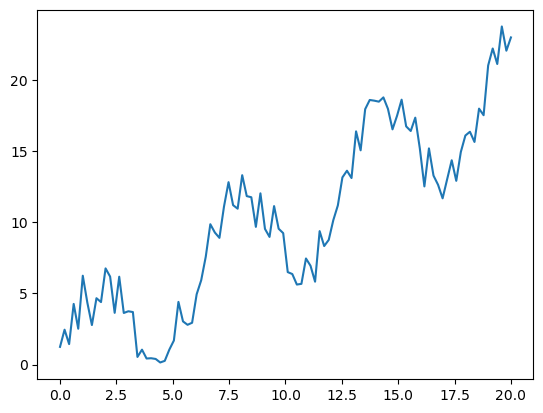

In [37]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)
plt.show()

Elimination de la tendance linéaire

In [38]:
from scipy import signal

In [39]:
new_y = signal.detrend(y)

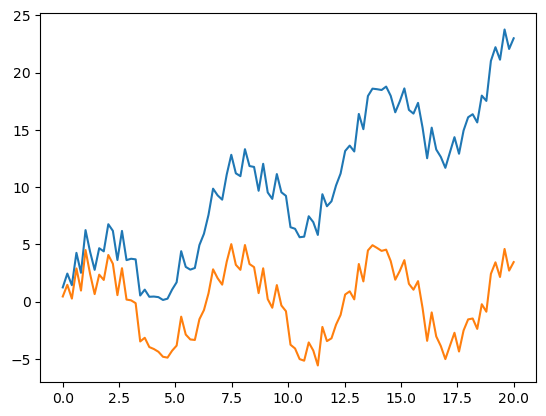

In [40]:
plt.plot(x, y)
plt.plot(x, new_y)
plt.show()

Transformation de fourrier

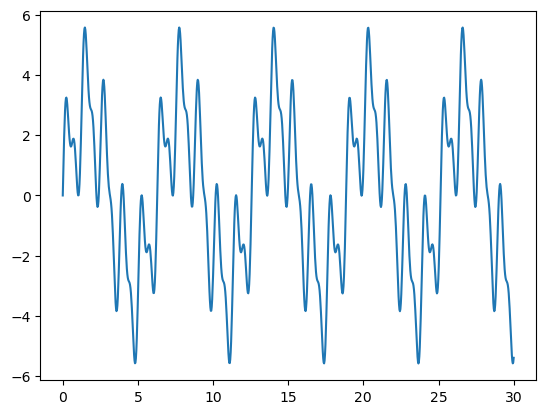

In [42]:
# génération d'un signal
a = np.linspace(0, 30, 1000)
b = 3*np.sin(a) + 2*np.sin(5*a) + np.sin(10*a) # signal
plt.plot(a, b)
plt.show()

In [43]:
from scipy import fftpack

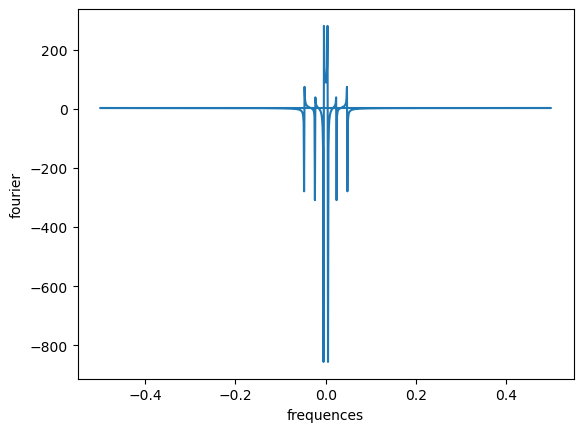

In [45]:
fourier = fftpack.fft(b)
frequences = fftpack.fftfreq(b.size)
plt.plot(frequences, fourier)
plt.xlabel('frequences')
plt.ylabel('fourier')
plt.show()

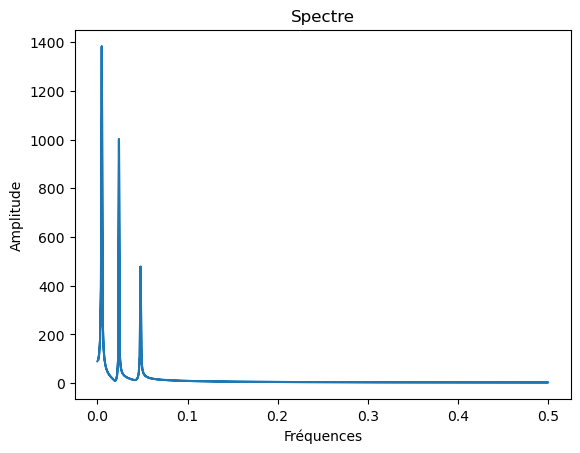

In [47]:
# Filtrage pour obtenir le spectre escompté
plt.plot(np.abs(frequences), np.abs(fourier))
plt.xlabel('Fréquences')
plt.ylabel('Amplitude')
plt.title('Spectre')
plt.show()

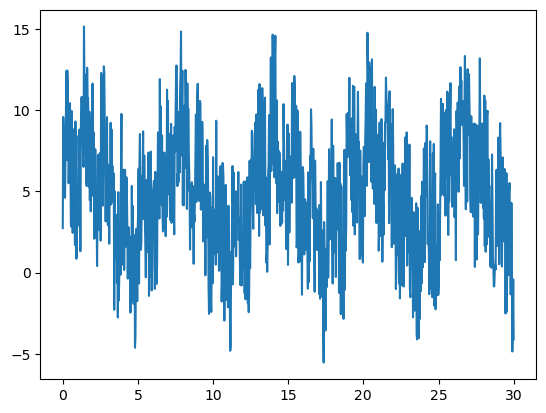

In [57]:
a = np.linspace(0, 30, 1000)
b = 3*np.sin(a) + 2*np.sin(5*a) + np.sin(10*a) + 10*np.random.random(a.shape[0])  # signal avec bruit
plt.plot(a, b)
plt.show()

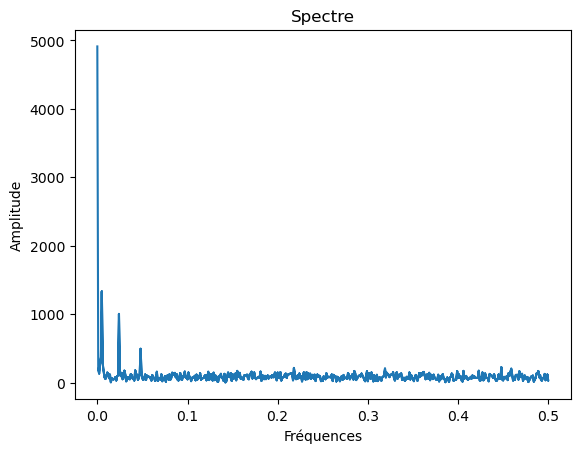

In [58]:
# Filtrage pour obtenir le spectre escompté

fourier = fftpack.fft(b)
frequences = fftpack.fftfreq(b.size)
plt.plot(np.abs(frequences), np.abs(fourier))
plt.xlabel('Fréquences')
plt.ylabel('Amplitude')
plt.title('Spectre')
plt.show()

In [59]:
fourier[np.abs(fourier) < 400] = 0

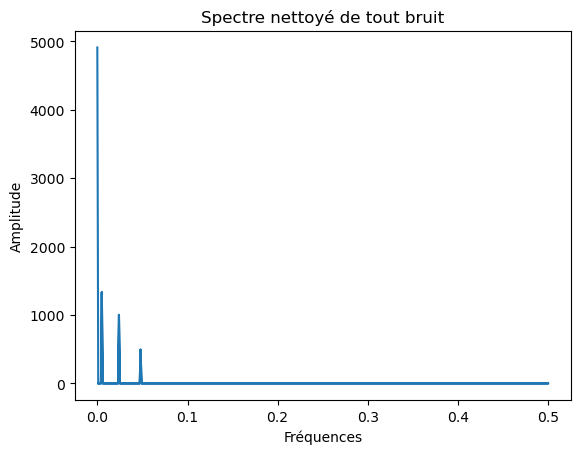

In [61]:
plt.plot(np.abs(frequences), np.abs(fourier))
plt.xlabel('Fréquences')
plt.ylabel('Amplitude')
plt.title('Spectre nettoyé de tout bruit')
plt.show()

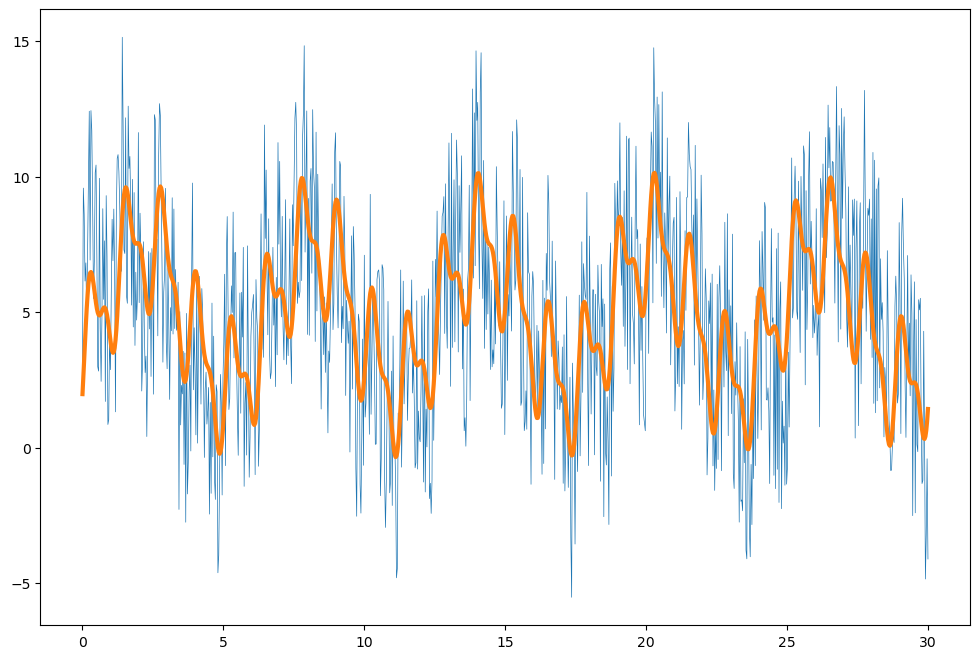

In [67]:
# Application de transformée de fourier à ce spectre sans bruit
filtered_signal = fftpack.ifft(fourier)
filtered_signal

plt.figure(figsize = (12, 8))
plt.plot(a, b, lw = 0.5)
plt.plot(a, filtered_signal, lw = 3)
plt.show()

## Module nd image pour le traitement d'image

In [68]:
from scipy import ndimage

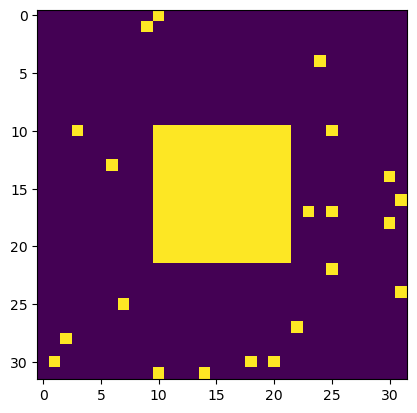

In [69]:
M = np.zeros((32, 32))
M[10:-10, 10:-10] = 1
M[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(M)

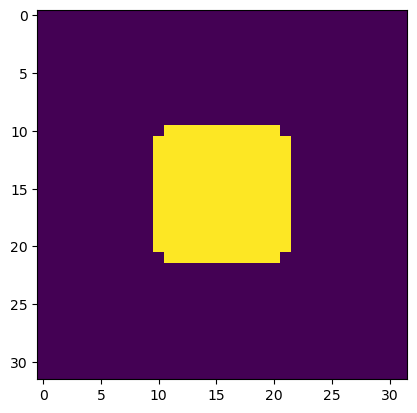

In [71]:
# On cherche à retirer les pixels qui sont des artéfacts: 
# On utilise une méthode qui combine érosion et dilation

open_M = ndimage.binary_opening(M)
plt.imshow(open_M)

Application: analyse d'une image de bactérie

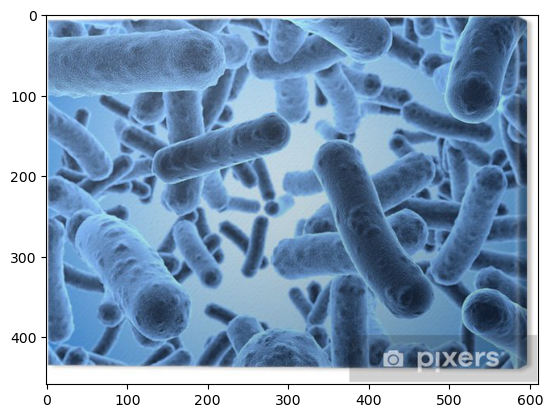

In [73]:
# Importation de l'image avec : plt.imread('fichier.png')
image = plt.imread('bactérie.jpg')
plt.imshow(image)

In [74]:
image.shape

(459, 611, 3)

(459, 611)

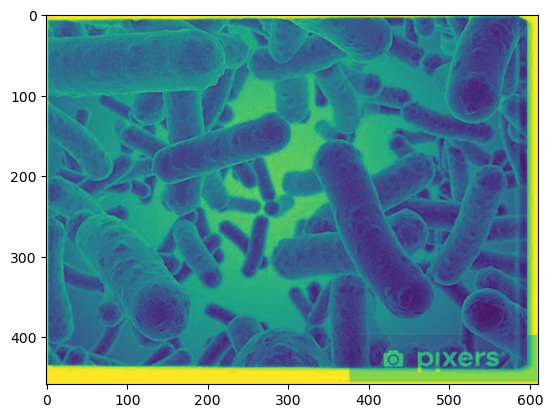

In [76]:
# Nous utiliserons une image 2D

image2d = image[:,:,0]
plt.imshow(image2d)
image2d.shape

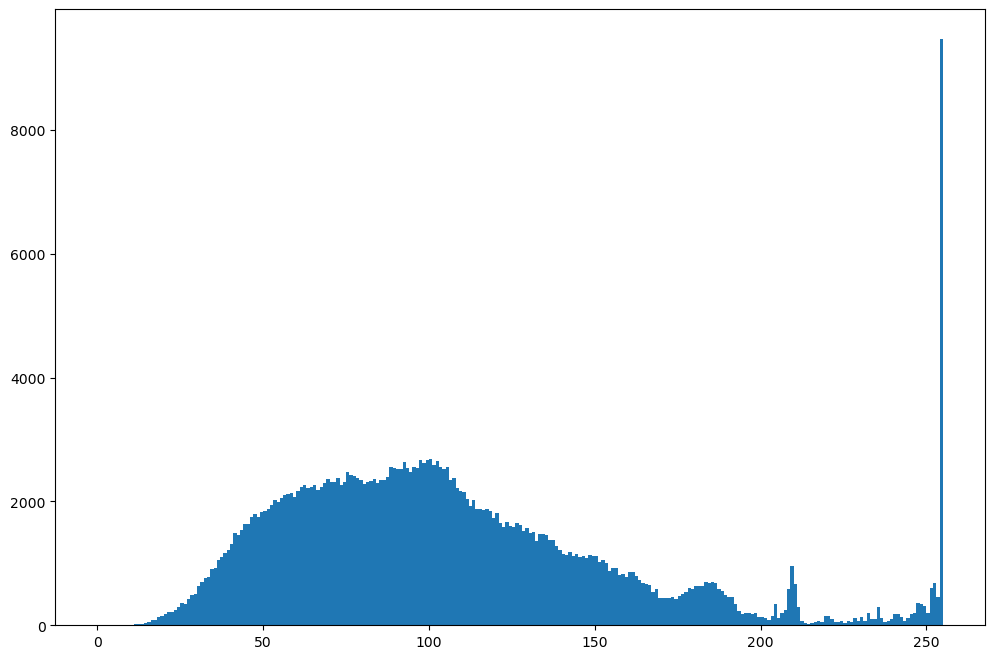

In [82]:
# Extraction des bactéries de l'arrière-plan

copy_image = np.copy(image2d) # Une copy de l'image 
plt.figure(figsize = (12, 8))
plt.hist(copy_image.ravel(), bins = 255) # l'image copiée est applatie pour constuire un histogramme
plt.show()

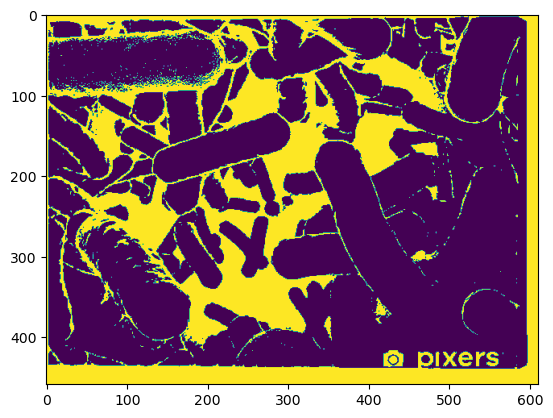

In [116]:
masque = (image2d > 123) # & (image2d < 175)
plt.imshow(masque)

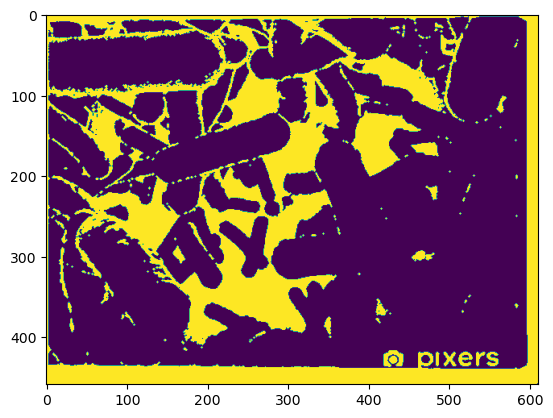

In [117]:
# Elimination des artéfacts
open_im = ndimage.binary_opening(masque)
plt.imshow(open_im)

In [121]:
# Etiquettes et nombre d'étiquettes sur les bactéries visibles
label_image, n_labels = ndimage.label(open_im)
print('Nombre de bactéries:', n_labels)

Nombre de bactéries: 157


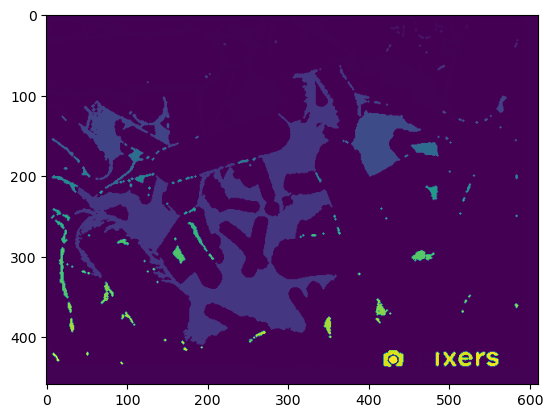

In [122]:
# Visualisation des différents groupes de bactéries
plt.imshow(label_image)

In [123]:
# Taille de chaque bactérie avec ndimage.sum(image, label, range())
sizes = ndimage.sum(open_im, label_image, range(n_labels))
print('Tailles:', sizes)

Tailles: [0.0000e+00 4.0015e+04 8.0000e+00 5.9000e+01 1.6000e+01 3.9000e+01
 3.8000e+01 8.0000e+00 8.0000e+00 1.1000e+01 2.0000e+01 5.0000e+00
 8.0000e+00 5.0000e+00 1.1000e+01 1.6000e+01 8.0000e+00 1.1000e+01
 5.0000e+00 1.0000e+01 5.0000e+00 8.0000e+00 2.8000e+01 5.0000e+00
 5.0000e+01 2.7853e+04 5.0000e+00 1.0000e+01 5.0000e+00 3.0000e+01
 2.2700e+02 1.2300e+02 3.0890e+03 2.2000e+01 5.0000e+00 1.2000e+01
 3.4670e+03 1.2000e+01 1.1000e+01 5.0000e+00 1.7000e+01 1.0000e+01
 1.1000e+01 5.0000e+00 8.0000e+00 1.7000e+01 5.0000e+00 1.0000e+01
 5.0000e+00 1.0000e+01 9.2000e+01 5.0000e+00 5.0000e+00 1.1000e+01
 5.0000e+00 4.0000e+02 8.0000e+00 3.3100e+02 1.4000e+01 1.1000e+01
 1.0000e+01 2.6000e+01 1.2000e+01 8.0000e+00 1.2000e+01 4.0000e+01
 5.0000e+00 6.0000e+01 1.1000e+01 5.0000e+00 3.3000e+01 1.1000e+02
 5.0000e+00 1.4000e+01 1.5400e+02 5.0000e+00 8.0000e+00 1.4000e+01
 8.0000e+00 1.0000e+01 1.4000e+01 5.0000e+00 8.0000e+00 8.0000e+00
 1.1000e+01 3.1000e+01 1.3800e+02 8.0000e+00 1.2000e+

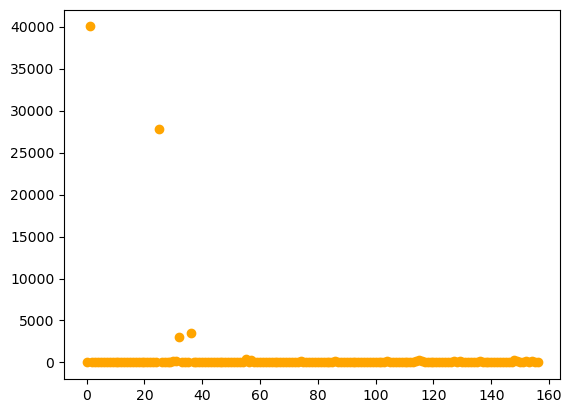

In [126]:
# Visualisation des tailles
plt.scatter(range(n_labels), sizes, c = 'orange')
plt.show()